# Análisis de Incidentes que Afectan a Miembros de la Fuerza Pública Colombiana (2010–2025)

## Informe de Proyecto Final

### Introducción
Este cuaderno analiza un conjunto de datos que registra incidentes que afectan a miembros de la fuerza pública colombiana desde enero de 2010 hasta abril de 2025. El conjunto incluye detalles como la fecha, ubicación (departamento y municipio), tipo de acción (herido o asesinado) y la cantidad de personas afectadas. El objetivo es identificar tendencias temporales, zonas de mayor riesgo y la gravedad de los incidentes.

### Descripción del Conjunto de Datos
- **Fuente**: `AFECTACI_N_DE_MIEMBROS_DE_LA_FUERZA_P_BLICA_20250616.csv`
- **Columnas**:
  - `FECHA HECHO`: Fecha del incidente (DD/MM/YYYY).
  - `COD_DEPTO`: Código del departamento (numérico).
  - `DEPARTAMENTO`: Nombre del departamento (cadena).
  - `COD_MUNI`: Código del municipio (numérico).
  - `MUNICIPIO`: Nombre del municipio (cadena).
  - `ACCION`: Tipo de acción (`HERIDO` para heridos, `ASESINADO` para asesinados).
  - `CANTIDAD`: Número de personas afectadas (numérico).
- **Período**: 1 de enero de 2010 al 30 de abril de 2025.

### Objetivos
- Identificar tendencias en los incidentes a lo largo del tiempo.
- Determinar los departamentos y municipios más afectados.
- Comparar la frecuencia y gravedad de heridos vs. asesinados.
- Resaltar un hallazgo interesante.


In [ ]:
%pip install pandas matplotlib seaborn

In [ ]:
# Importar librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Configurar estilos de gráficos para consistencia
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')



## 1. Carga y Limpieza de Datos

Cargamos el archivo CSV y realizamos pasos de limpieza para garantizar la calidad de los datos:
- Parseamos las fechas en `FECHA HECHO`.
- Validamos que `CANTIDAD` sea un entero positivo.
- Verificamos valores faltantes o inconsistentes en `ACCION`, `DEPARTAMENTO` y `MUNICIPIO`.
- Eliminamos filas duplicadas o inválidas.


In [ ]:
# Cargar el conjunto de datos
df = pd.read_csv('data/AFECTACI_N_DE_MIEMBROS_DE_LA_FUERZA_P_BLICA_20250616.csv', encoding='utf-8')

# Mostrar las primeras filas
print("Primeras 5 filas del conjunto de datos:")
display(df.head())

# Información básica
print("\nInformación del Conjunto de Datos:")
df.info()

# Pasos de limpieza
# Parsear fechas
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')

# Validar CANTIDAD
df['CANTIDAD'] = pd.to_numeric(df['CANTIDAD'], errors='coerce')
df = df[df['CANTIDAD'] > 0]

# Verificar valores faltantes
print("\nValores Faltantes:")
print(df.isnull().sum())

# Eliminar filas con valores faltantes en columnas críticas
df = df.dropna(subset=['FECHA HECHO', 'DEPARTAMENTO', 'MUNICIPIO', 'ACCION', 'CANTIDAD'])

# Normalizar ACCION
df['ACCION'] = df['ACCION'].str.strip().str.upper()
acciones_validas = ['HERIDO', 'ASESINADO']
df = df[df['ACCION'].isin(acciones_validas)]

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")
df = df.drop_duplicates()

# Forma final del conjunto
print(f"\nForma del conjunto de datos limpio: {df.shape}")


Primeras 5 filas del conjunto de datos:


,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,ACCION,CANTIDAD
0,01/01/2010,50,META,50350,LA MACARENA,HERIDO,1
1,01/01/2010,27,CHOCO,27787,TADO,HERIDO,1
2,01/01/2010,5,ANTIOQUIA,5266,ENVIGADO,HERIDO,1
3,01/01/2010,5,ANTIOQUIA,5308,GIRARDOTA,HERIDO,1
4,01/01/2010,19,CAUCA,19050,ARGELIA,HERIDO,2



Información del Conjunto de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA HECHO   20645 non-null  object
 1   COD_DEPTO     20645 non-null  int64 
 2   DEPARTAMENTO  20645 non-null  object
 3   COD_MUNI      20645 non-null  int64 
 4   MUNICIPIO     20645 non-null  object
 5   ACCION        20645 non-null  object
 6   CANTIDAD      20645 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB

Valores Faltantes:
FECHA HECHO     0
COD_DEPTO       0
DEPARTAMENTO    0
COD_MUNI        0
MUNICIPIO       0
ACCION          0
CANTIDAD        0
dtype: int64

Número de filas duplicadas: 4426

Forma del conjunto de datos limpio: (16218, 7)


## 2. Análisis Exploratorio de Datos (EDA)

Calculamos estadísticas resumidas para entender el conjunto de datos:
- Total de incidentes y personas afectadas.
- Desglose por tipo de acción (`HERIDO` vs. `ASESINADO`).
- Departamentos y municipios más afectados.
- Rango temporal y distribución de incidentes.


In [29]:
# Estadísticas resumidas
total_incidentes = len(df)
total_afectados = df['CANTIDAD'].sum()
conteo_acciones = df.groupby('ACCION')['CANTIDAD'].sum()
top_departamentos = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum().nlargest(5)
top_municipios = df.groupby('MUNICIPIO')['CANTIDAD'].sum().nlargest(5)

print(f"Total de Incidentes: {total_incidentes}")
print(f"Total de Personas Afectadas: {total_afectados}")
print("\nPersonas Afectadas por Tipo de Acción:")
print(conteo_acciones)
print("\nTop 5 Departamentos por Personas Afectadas:")
print(top_departamentos)
print("\nTop 5 Municipios por Personas Afectadas:")
print(top_municipios)

# Rango temporal
fecha_min = df['FECHA HECHO'].min()
fecha_max = df['FECHA HECHO'].max()
print(f"\nRango Temporal: {fecha_min} al {fecha_max}")


Total de Incidentes: 16218
Total de Personas Afectadas: 19715

Personas Afectadas por Tipo de Acción:
ACCION
ASESINADO     2648
HERIDO       17067
Name: CANTIDAD, dtype: int64

Top 5 Departamentos por Personas Afectadas:
DEPARTAMENTO
VALLE DEL CAUCA       3009
ANTIOQUIA             2392
BOGOTA D.C.           2027
CAUCA                 1495
NORTE DE SANTANDER    1197
Name: CANTIDAD, dtype: int64

Top 5 Municipios por Personas Afectadas:
MUNICIPIO
BOGOTA, D.C.            2003
CALI                    1736
MEDELLIN                 510
SAN ANDRES DE TUMACO     368
NEIVA                    299
Name: CANTIDAD, dtype: int64

Rango Temporal: 2010-01-01 00:00:00 al 2025-04-30 00:00:00


## 3. Graficas 

1. **Gráfico de Líneas**: Incidentes a lo largo del tiempo (por año).
2. **Gráfico de Barras**: 10 departamentos más afectados.
3. **Gráfico de Barras Apiladas**: Heridos vs. asesinados por año.
4. **Gráfico de Pastel**: Proporción de heridos vs. asesinados.



### 3.1 Gráfico de Líneas: Incidentes a lo Largo del Tiempo

**Propósito**: Mostrar la tendencia de incidentes que afectan a la fuerza pública entre 2010 y 2025.


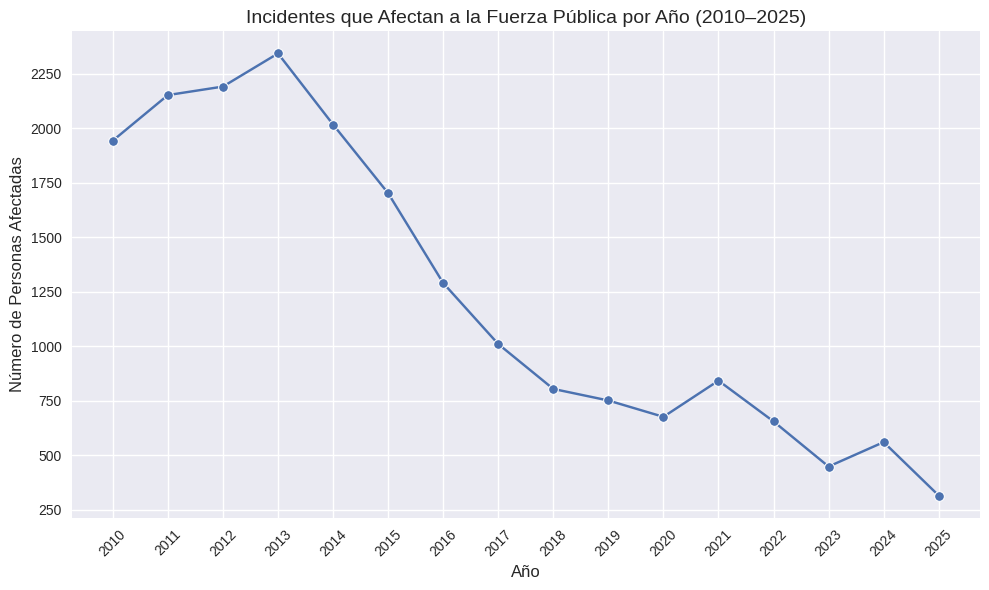

Hallazgo: El gráfico de líneas muestra fluctuaciones en los incidentes, con posibles picos en ciertos años, lo que sugiere variaciones en los niveles de violencia contra la fuerza pública.


In [23]:
# Agregar por año
df['Año'] = df['FECHA HECHO'].dt.year
datos_anuales = df.groupby('Año')['CANTIDAD'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=datos_anuales, x='Año', y='CANTIDAD', marker='o')
plt.title('Incidentes que Afectan a la Fuerza Pública por Año (2010–2025)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Personas Afectadas', fontsize=12)
plt.xticks(datos_anuales['Año'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Hallazgo: El gráfico de líneas muestra fluctuaciones en los incidentes, con posibles picos en ciertos años, lo que sugiere variaciones en los niveles de violencia contra la fuerza pública.")


### 3.2 Gráfico de Barras: Top 10 Departamentos

**Propósito**: Identificar los departamentos con mayor número de personas afectadas.


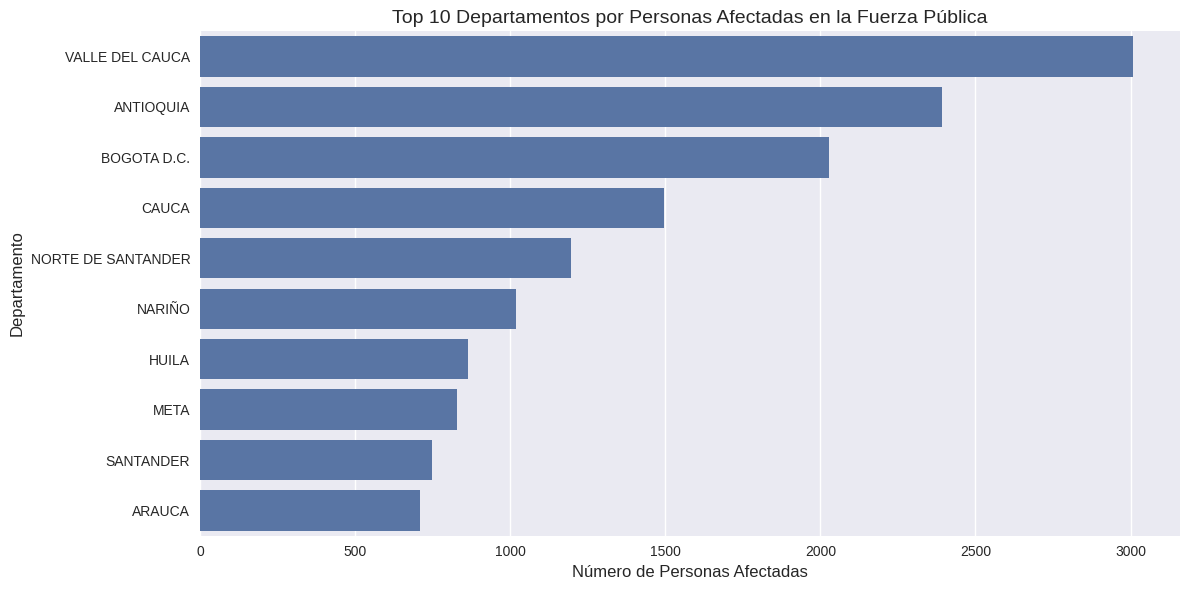

Hallazgo: Departamentos como Cauca y Valle del Cauca están entre los más afectados, lo que indica desafíos significativos de seguridad en estas regiones.


In [24]:
# Agregar por departamento
datos_dept = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum().nlargest(10).reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=datos_dept, x='CANTIDAD', y='DEPARTAMENTO')
plt.title('Top 10 Departamentos por Personas Afectadas en la Fuerza Pública', fontsize=14)
plt.xlabel('Número de Personas Afectadas', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.tight_layout()
plt.show()

print("Hallazgo: Departamentos como Cauca y Valle del Cauca están entre los más afectados, lo que indica desafíos significativos de seguridad en estas regiones.")


### 3.3 Gráfico de Barras Apiladas: Heridos vs. Asesinados por Año

**Propósito**: Comparar el número de heridos y asesinados a lo largo del tiempo.


In [25]:
# Pivotar datos
datos_apilados = df.pivot_table(index='Año', columns='ACCION', values='CANTIDAD', aggfunc='sum', fill_value=0).reset_index()

# Crear gráfico de barras apiladas
fig = go.Figure(data=[
    go.Bar(name='Heridos (HERIDO)', x=datos_apilados['Año'], y=datos_apilados.get('HERIDO', 0), marker_color='blue'),
    go.Bar(name='Asesinados (ASESINADO)', x=datos_apilados['Año'], y=datos_apilados.get('ASESINADO', 0), marker_color='red')
])

# Actualizar diseño
fig.update_layout(
    barmode='stack',
    title='Heridos vs. Asesinados en la Fuerza Pública por Año (2010–2025)',
    xaxis_title='Año',
    yaxis_title='Número de Personas Afectadas',
    xaxis=dict(tickmode='linear'),
    legend=dict(x=0.8, y=1.1),
    template='plotly_white'
)

fig.show()

print("Hallazgo: Los heridos superan consistentemente a los asesinados, pero ciertos años muestran picos en asesinatos, indicando períodos de mayor violencia.")


Hallazgo: Los heridos superan consistentemente a los asesinados, pero ciertos años muestran picos en asesinatos, indicando períodos de mayor violencia.


### 3.4 Gráfico de Pastel: Proporción de Heridos vs. Asesinados

**Propósito**: Mostrar la distribución general de heridos vs. asesinados.


In [30]:
# Agregar por acción
datos_pastel = df.groupby('ACCION')['CANTIDAD'].sum().reset_index()

# Crear gráfico de pastel
fig = px.pie(datos_pastel, values='CANTIDAD', names='ACCION', title='Proporción de Heridos vs. Asesinados (2010–2025)',
             color='ACCION', color_discrete_map={'HERIDO': 'blue', 'ASESINADO': 'red'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(template='plotly_white')
fig.show()

print("Hallazgo: La mayoría de los incidentes resultan en heridos en lugar de asesinatos, destacando la prevalencia de ataques no letales.")


Hallazgo: La mayoría de los incidentes resultan en heridos en lugar de asesinatos, destacando la prevalencia de ataques no letales.


## 4. Hallazgo Interesante

Analizamos el municipio más afectado por número de personas.


In [32]:
# Calcular municipio más afectado
datos_muni = df.groupby('MUNICIPIO')['CANTIDAD'].sum()
muni_top = datos_muni.idxmax()
muni_top_conteo = datos_muni.max()
total_afectados = datos_muni.sum()
porcentaje = (muni_top_conteo / total_afectados * 100).round(1)

print(f"Hallazgo Interesante: {muni_top} es el municipio con el mayor número de personas afectadas en la fuerza pública, con {muni_top_conteo} individuos ({porcentaje}% del total). Esto sugiere que {muni_top} es un punto crítico de violencia contra la fuerza pública.")


Hallazgo Interesante: BOGOTA, D.C. es el municipio con el mayor número de personas afectadas en la fuerza pública, con 2003 individuos (10.2% del total). Esto sugiere que BOGOTA, D.C. es un punto crítico de violencia contra la fuerza pública.


## 5. Conclusión y Recomendaciones

### Resumen de Hallazgos
- **Tendencias Temporales**: Los incidentes fluctúan durante el período de 15 años, con picos significativos en ciertos años.
- **Gravedad**: Los heridos son más comunes que los asesinados, pero las muertes siguen siendo una preocupación en años y regiones específicas.

### Recomendaciones
1. **Medidas de Seguridad Específicas**: Desplegar recursos adicionales en áreas de alto riesgo.
2. **Análisis Temporal**: Investigar los años con picos de incidentes para entender las causas subyacentes (ej., disturbios políticos, actividad de grupos armados).
3. **Capacitación y Equipos**: Mejorar la capacitación y proporcionar mejor equipo de protección para reducir heridos y asesinados.
4. **Monitoreo de Datos**: Continuar recolectando y analizando datos para evaluar la efectividad de las intervenciones.

### Trabajo Futuro
- Incorporar datos externos (ej., eventos de conflicto, factores socioeconómicos) para contextualizar los incidentes.
- Usar aprendizaje automático para predecir áreas y momentos de alto riesgo.
- Crear un tablero interactivo para monitoreo en tiempo real.
